In [ ]:
'''
[X]- find dataset (imdb sentiment analysis)
[X]- divide into train/test
[X]- create graph showing distribution of target classes
[X]- describe dataset and what the model should be able to predict
- using sklearn, try:
  [X]- naive bayes
  [X]- logistic regression
  [X]- neural networks
- write up analysis of performance of various approaches
- accuracy does not determine grade -> quality of analysis determines grade
'''

In [ ]:
import csv
import pandas as pd
# first row is review and second row is label (0 = negative, 1 = positive)
#df = pd.read_csv('movie.csv', header=0, usecols=[1,2], quoting=csv.QUOTE_NONE, encoding='utf-8') #'latin-1')
df = pd.read_csv('movie.csv')
print('rows and columns:', df.shape)
df.head()

rows and columns: (40000, 2)


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
# text preprocessing
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# clean data (no duplicates and NaN)
df.drop_duplicates(inplace=True)
no_of_nan_values=df.isna().sum().sum()
print(no_of_nan_values)

0


In [ ]:
df['text_word_count']=df['text'].apply(lambda x:len(x.split()))
print(type(df['text_word_count']))
print(df['text_word_count'])

<class 'pandas.core.series.Series'>
0        151
1        326
2        184
3         69
4        178
        ... 
39995    541
39996     50
39997    168
39998    168
39999    137
Name: text_word_count, Length: 39723, dtype: int64


In [ ]:
# text preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = set(stopwords.words('english'))
#vectorizer = TfidfVectorizer(stop_words=list(stopwords))
vectorizer_b = TfidfVectorizer(stop_words=list(stopwords), binary=True)
# .{column names}
X = df.text   #features
print(type(X))
Y = df.label  #targets
print(type(Y))
X.head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


0    I grew up (b. 1965) watching and loving the Th...
1    When I put this movie in my DVD player, and sa...
2    Why do people who do not know what a particula...
3    Even though I have great interest in Biblical ...
4    Im a die hard Dads Army fan and nothing will e...
Name: text, dtype: object

In [ ]:
# divide into train/test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, train_size=0.75, random_state=1234)
X_train.shape


(29792,)

In [ ]:
# apply tfidf vectorizer
X_train_list = X_train.values.astype('U').tolist()
X_test_list = X_test.values.astype('U').tolist()
X_train = vectorizer_b.fit_transform(X_train_list)  # fit and transform the train data
X_test = vectorizer_b.transform(X_test_list)        # transform only the test data


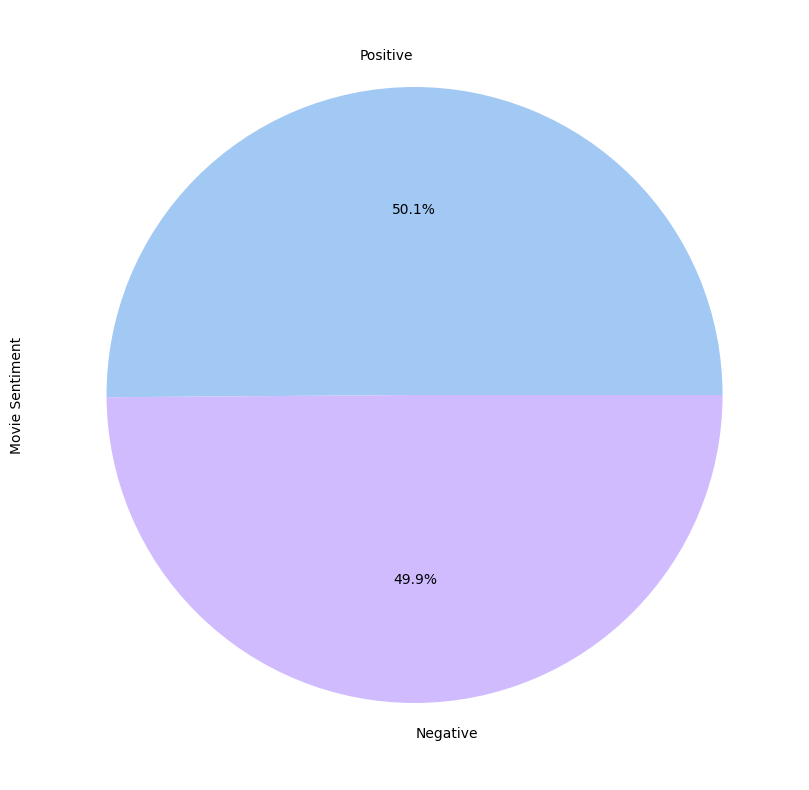

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
#colors=['#AB47BC','#6495ED']
colors = [sb.color_palette('pastel')[0], sb.color_palette('pastel')[4]]
plt.pie(df['label'].value_counts(),labels=['Positive','Negative'],autopct='%.1f%%',colors=colors);
plt.ylabel('Movie Sentiment');


## Describe dataset and what the model should be able to predict:

This dataset contains movie reviews from IMDB and consists of two columns: text and label. The text column contains the text of the review and the label column either has a 0 for a negative label or a 1 for a positive label. This model should be able to predict the sentiment of movie reviews on IMDB.

# Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import BernoulliNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, Y_train)
# naive_bayes2 = BernoulliNB()
# naive_bayes2.fit(X_train, Y_train)

MultinomialNB()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# make predictions on the test data
pred = naive_bayes.predict(X_test)

# print confusion matrix
# confusion matrix has this form
#     tp   fp
#     fn   tn
print(confusion_matrix(Y_test, pred))

[[3508  493]
 [ 625 3319]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4001
           1       0.87      0.84      0.86      3944

    accuracy                           0.86      7945
   macro avg       0.86      0.86      0.86      7945
weighted avg       0.86      0.86      0.86      7945



In [32]:
# print('negative size in test data:',Y_test[Y_test==0].shape[0])
# print('test size: ', len(Y_test))
baseline = Y_test[Y_test==0].shape[0] / Y_test.shape[0] 
print("baseline: " + str(baseline))

baseline: 0.5035871617369415


# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
# set up X and Y
X = df.text
y = df.label

# divide into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=1234)

# vectorizer
vectorizer = TfidfVectorizer(binary=True)
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data

#train
classifier = LogisticRegression(solver='lbfgs', class_weight='balanced')
classifier.fit(X_train, Y_train)

# evaluate
pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(Y_test, pred))
print('precision score: ', precision_score(Y_test, pred))
print('recall score: ', recall_score(Y_test, pred))
print('f1 score: ', f1_score(Y_test, pred))
probs = classifier.predict_proba(X_test)
print('log loss: ', log_loss(Y_test, probs))

accuracy score:  0.8943989930774072
precision score:  0.8849491693528391
recall score:  0.9049188640973631
f1 score:  0.8948226150181773
log loss:  0.2923242321652334


# Neural Network

In [24]:
# set up X and Y
X = vectorizer_b.fit_transform(df.text)
Y = df.label

In [25]:
from sklearn.neural_network import MLPClassifier

# divide into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, train_size=0.75, random_state=1234)

classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 2), random_state=1)
classifier.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(Y_test, pred))
print('precision score: ', precision_score(Y_test, pred))
print('recall score: ', recall_score(Y_test, pred))
print('f1 score: ', f1_score(Y_test, pred))

accuracy score:  0.8756419293122546
precision score:  0.8753283491614468
recall score:  0.8751515151515151
f1 score:  0.8752399232245681


This neural network has a higher f1 and accuracy than the naive bayes, but lower than the logistic regression.